<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h2><center>Seminar: Supervised learning quality measures</center></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns', 500)

# Classification Quaity Metrics

We will consider a range of classification quality metrics solving a classification problem using all classifiers you have already learnt. We will compare these classifiers and select the best one for the problem.

## Read Data

We are going to consider a dataset from [data analysis competition](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29). 

One of the ways to increase the efficiency of the bank’s interaction with customers is to send an offer for a new service not to all bank customers, but only to a certain part selected based on the greatest tendency to respond to this offer.

The competition task is to propose an algorithm that will estimate of the client's tendency to a positive response according to its characteristic description. This may be interpreted as the probability of a positive response. It is assumed that, having received such estimates for a certain set of clients, the bank will address the offer only to those clients whose probability is above a certain threshold.

Dataset description:

* **AGREEMENT_RK**:	unique identifier
* **TARGET**: target feature. Response to the marketing campaign (1 - the response was registered, 0 - there was no response)
* **AGE**: customer age
* **SOCSTATUS_WORK_FL**: social status of the client relative to work (1 - works, 0 - does not work)
* **SOCSTATUS_PENS_FL**: social status of the client relative to the pension (1 - retired, 0 - not retired)
* **GENDER**: gender of the client
* **CHILD_TOTAL**: number of children of the client
* **DEPENDANTS**: number of client dependents
* **EDUCATION**: education
* **MARITAL_STATUS**: marital status 


* **GEN_INDUSTRY**: customer work industry
* **GEN_TITLE**: position
* **ORG_TP_STATE**: ownership of the company
* **ORG_TP_FCAPITAL**: relation to foreign capital
* **JOB_DIR**:	activity inside the company
* **FAMILY_INCOME**:	family income (several categories)
* **PERSONAL_INCOME**:	client's personal income (in rubles)


* **REG_ADDRESS_PROVINCE**:	customer registration area
* **FACT_ADDRESS_PROVINCE**:	client's actual area
* **POSTAL_ADDRESS_PROVINCE**:	postal address of the area
* **TP_PROVINCE**:	area of the outlet where the customer took the last loan
* **REGION_NM**:	region of the Russian Federation
* **REG_FACT_FL**:	the registration address and the address of the actual stay of the client coincide (1 - matches, 0 - does not match)
* **FACT_POST_FL**:	the address of the actual stay of the client and his mailing address are the same (1 is the same, 0 is not the same)
* **REG_POST_FL**:	the registration address of the client and his postal address match (1 - matches, 0 - does not match)
* **REG_FACT_POST_FL**:	postal, actual and registration address match (1 - match, 0 - do not match)
* **REG_FACT_POST_TP_FL**:	the area of registration, the actual stay, postal address and the location of the outlet where the customer took the loan match (1 - match, 0 - do not match)


* **FL_PRESENCE_FL**:	the ownership of the apartment (1 - yes, 0 - no)
* **OWN_AUTO**:	number of cars in the property
* **AUTO_RUS_FL**:	ownership of a Russian-made car (1 - yes, 0 - no)
* **HS_PRESENCE_FL**:	the presence of a country house in the property (1 - yes, 0 - no)
* **COT_PRESENCE_FL**:	the ownership of the cottage (1 - yes, 0 - no)
* **GAR_PRESENCE_FL**:	the presence in the property of the garage (1 - yes, 0 - no)
* **LAND_PRESENCE_FL**:	the ownership of the land (1 - yes, 0 - no)


* **CREDIT**:	amount of the client’s last loan (in rubles)
* **TERM**:	credit term
* **FST_PAYMENT**:	down payment (in rubles)
* **DL_DOCUMENT_FL**:	the client indicated the driver's license in the questionnaire (1 - indicated, 0 - did not indicate)
* **GPF_DOCUMENT_FL**:	In the questionnaire, the client indicated GPF (1 - indicated, 0 - did not indicate)


* **FACT_LIVING_TERM**:	the number of months of residence at the place of actual stay
* **WORK_TIME**:	working time at the current location (in months)
* **FACT_PHONE_FL**: presence in the application of the phone at the actual place of stay
* **REG_PHONE_FL**:	presence in the application of the phone at the place of registration
* **GEN_PHONE_FL**:	presence in the application of a working phone


* **LOAN_NUM_TOTAL**:	amount of customer loans
* **LOAN_NUM_CLOSED**:	amount of customer loan repaid
* **LOAN_NUM_PAYM**:	the number of payments made by the client
* **LOAN_DLQ_NUM**:	number of customer delinquencies
* **LOAN_MAX_DLQ**:	maximum delay number allowed by the client
* **LOAN_AVG_DLQ_AMT**:	average amount of delay (in rubles)
* **LOAN_MAX_DLQ_AMT**:	maximum amount of delay (in rubles)
* **PREVIOUS_CARD_NUM_UTILIZED**:	the number of already recycled cards (if empty - 0)

In [2]:
data = pd.read_excel('data/data_train_complete.xlsx')

In [3]:
data.head()

,AGE,AGREEMENT_RK,AUTO_RUS_FL,CHILD_TOTAL,COT_PRESENCE_FL,CREDIT,DEPENDANTS,DL_DOCUMENT_FL,EDUCATION,FACT_ADDRESS_PROVINCE,FACT_LIVING_TERM,FACT_PHONE_FL,FACT_POST_FL,FAMILY_INCOME,FL_PRESENCE_FL,FST_PAYMENT,GAR_PRESENCE_FL,GENDER,GEN_INDUSTRY,GEN_PHONE_FL,GEN_TITLE,GPF_DOCUMENT_FL,HS_PRESENCE_FL,JOB_DIR,LAND_PRESENCE_FL,LOAN_AVG_DLQ_AMT,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_MAX_DLQ_AMT,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_NUM_TOTAL,MARITAL_STATUS,ORG_TP_FCAPITAL,ORG_TP_STATE,OWN_AUTO,PERSONAL_INCOME,POSTAL_ADDRESS_PROVINCE,PREVIOUS_CARD_NUM_UTILIZED,REGION_NM,REG_ADDRESS_PROVINCE,REG_FACT_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,REG_PHONE_FL,REG_POST_FL,SOCSTATUS_PENS_FL,SOCSTATUS_WORK_FL,TARGET,TERM,TP_PROVINCE,WORK_TIME
0,32,18669,0,3,0,21650.00,3,0,Среднее,Кабардино-Балкария,137,1,1,от 10000 до 20000 руб.,0,4000.00,0,1,Торговля,1,Рабочий,1,0,Участие в основ. деятельности,0,4020.0,1,1,4020.0,1,6,1,Состою в браке,Без участия,Индивидуальный предприниматель,0,12000.0,Кабардино-Балкария,NaN,ЮЖНЫЙ,Кабардино-Балкария,1,1,0,0,1,0,1,0,6,Ставропольский край,97.0
1,53,21045,0,2,0,32914.31,0,0,Высшее,Ярославская область,228,1,1,свыше 50000 руб.,0,29080.92,0,0,Здравоохранение,1,Руководитель высшего звена,0,0,Участие в основ. деятельности,0,0.0,0,0,0.0,1,3,1,Состою в браке,Без участия,Частная компания,0,100000.0,Ярославская область,NaN,ЦЕНТРАЛЬНЫЙ 2,Ярославская область,1,1,1,0,1,0,1,0,4,Ярославская область,156.0
2,54,27126,0,2,0,5160.00,0,0,Среднее специальное,Карелия,240,1,1,от 20000 до 50000 руб.,1,600.00,0,1,Образование,1,Служащий,0,0,Пр-техн. обесп. и телеком.,0,0.0,0,0,0.0,1,3,1,Не состоял в браке,Без участия,Государственная комп./учреж.,0,19000.0,Карелия,NaN,ЦЕНТРАЛЬНЫЙ 2,Карелия,1,1,1,0,1,0,1,0,3,Карелия,120.0
3,45,26104,0,3,0,5770.00,1,0,Среднее специальное,Карелия,72,1,1,от 10000 до 20000 руб.,0,1020.00,0,1,Государственная служба,1,Рабочий,0,0,Служба безопасности,0,810.0,1,1,810.0,1,8,1,Разведен(а),Без участия,Государственная комп./учреж.,0,12000.0,Карелия,NaN,ЦЕНТРАЛЬНЫЙ 2,Карелия,1,1,1,0,1,0,1,0,9,Карелия,72.0
4,41,22056,0,0,0,79910.00,0,0,Высшее,Хабаровский край,5,1,1,свыше 50000 руб.,1,19990.00,0,1,Торговля,1,Индивидуальный предприниматель,1,0,Участие в основ. деятельности,0,0.0,0,0,0.0,1,4,1,Разведен(а),Без участия,Индивидуальный предприниматель,0,60000.0,Хабаровский край,NaN,ДАЛЬНЕВОСТОЧНЫЙ,Хабаровский край,1,1,1,0,1,0,1,1,5,Хабаровский край,168.0


## Preprocessing #1

Now we are going to run simple preprocessing, that is:

* Drop "hard" features `['EDUCATION', 'FACT_ADDRESS_PROVINCE', 'FAMILY_INCOME', 'GEN_INDUSTRY', 'GEN_TITLE', 'JOB_DIR', 'MARITAL_STATUS', 'ORG_TP_FCAPITAL', 'REGION_NM', 'REG_ADDRESS_PROVINCE', 'ORG_TP_STATE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE']`

In [4]:
def preproc(df_input):
    
    drop_cols = ['EDUCATION', 'FACT_ADDRESS_PROVINCE', 'FAMILY_INCOME', 'GEN_INDUSTRY', 
                 'GEN_TITLE', 'JOB_DIR', 'MARITAL_STATUS', 'ORG_TP_FCAPITAL', 'REGION_NM', 
                 'REG_ADDRESS_PROVINCE', 'ORG_TP_STATE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 
                 'AGREEMENT_RK']
    
    # Make a copy of data
    df_temp = df_input.copy()
    
    # Drop the hard columns
    df_temp = df_temp.drop(drop_cols, axis=1)
    
    # Fill NaNs with -999
    #df_temp = df_temp.fillna(-999)
    
    # Fill NaNs with 0.0
    #df_temp.loc[:,'PREVIOUS_CARD_NUM_UTILIZED'] = df_temp.loc[:,'PREVIOUS_CARD_NUM_UTILIZED'].fillna(0.0)
    
    return df_temp

In [5]:
data_preproc = preproc(data)

## Train / Test Split

In [6]:
label_col = data_preproc.columns == 'TARGET'

# Take all columns that are not TARGET
X = data_preproc.loc[:, ~label_col].values

# Take TARGET column
y = data_preproc.loc[:, label_col].values.flatten()

In [7]:
X[:2]

array([[3.200000e+01, 0.000000e+00, 3.000000e+00, 0.000000e+00,
        2.165000e+04, 3.000000e+00, 0.000000e+00, 1.370000e+02,
        1.000000e+00, 1.000000e+00, 0.000000e+00, 4.000000e+03,
        0.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 4.020000e+03, 1.000000e+00,
        1.000000e+00, 4.020000e+03, 1.000000e+00, 6.000000e+00,
        1.000000e+00, 0.000000e+00, 1.200000e+04,          nan,
        1.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 1.000000e+00, 6.000000e+00,
        9.700000e+01],
       [5.300000e+01, 0.000000e+00, 2.000000e+00, 0.000000e+00,
        3.291431e+04, 0.000000e+00, 0.000000e+00, 2.280000e+02,
        1.000000e+00, 1.000000e+00, 0.000000e+00, 2.908092e+04,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 3.000000e+00,
        1.000000e

In [8]:
y[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [9]:
from sklearn.model_selection import train_test_split

# Split data into train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Preprocessing #2

Replace missing values with mean feature values. To do this, we need to calculate mean values for each input feature using **train** sample. 

In [10]:
# Import imputer
from sklearn.impute import SimpleImputer

# Create object of the class and set up its parameters
imp = SimpleImputer(missing_values=np.nan, strategy="mean")

# Calculate mean values for each feature
imp.fit(X_train)

# Replace missing values in train and test samples
X_train = imp.transform(X_train)
X_test = imp.transform(X_test)

Scale input data using StandardScaler:
$$
X_{new} = \frac{X - \mu}{\sigma}
$$

In [11]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create object of the class and set up its parameters
ss = StandardScaler()

# Estimate mean and sigma values
ss.fit(X_train)

# Scale train and test samples
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

## Fit Classifiers

You have learnt three classifiers:
* kNN
* Decision Tree
* Logistic Regression

We will use scikit-learn implementation of these classifiers. Their descriptions: [kNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Let's just import them and fit.

In [12]:
# Import kNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Create object of the classifier's class
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
# Import Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create object of the classifier's class
dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, 
                            min_samples_split=2, min_samples_leaf=10, class_weight=None)

# Fit the classifier
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
# Import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

# Create object of the classifier's class
logreg = LogisticRegression(penalty='l2', C=1.0, max_iter=1000, class_weight=None)

# Fit the classifier
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Make Predictions

Make prediction of target **label**.

In [15]:
# kNN
y_test_knn = knn.predict(X_test)

# Decision Tree
y_test_dt = dt.predict(X_test)

# Logistic Regression
y_test_logreg = logreg.predict(X_test)

In [16]:
print("Truth  : ", y_test[:10])
print("kNN    : ", y_test_knn[:10])
print("DT     : ", y_test_dt[:10])
print("LogReg : ", y_test_logreg[:10])

Truth  :  [0 0 0 1 0 0 0 0 0 0]
kNN    :  [0 0 0 0 0 0 0 0 0 0]
DT     :  [0 0 0 0 0 0 0 0 0 0]
LogReg :  [0 0 0 0 0 0 0 0 0 0]


Make prediction of **probability** of customer's positive response.

In [17]:
# kNN
y_test_proba_knn = knn.predict_proba(X_test)[:, 1] # probability of positive response

# Decision Tree
y_test_proba_dt = dt.predict_proba(X_test)[:, 1]

# Logistic Regression
y_test_proba_logreg = logreg.predict_proba(X_test)[:, 1]

In [18]:
print("Truth  : ", y_test[:10])
print("kNN    : ", y_test_proba_knn[:10])
print("DT     : ", y_test_proba_dt[:10])
print("LogReg : ", y_test_proba_logreg[:10])

Truth  :  [0 0 0 1 0 0 0 0 0 0]
kNN    :  [0.  0.  0.2 0.4 0.  0.  0.2 0.  0.2 0. ]
DT     :  [0.         0.09090909 0.1        0.09090909 0.35714286 0.2
 0.         0.1        0.         0.        ]
LogReg :  [0.06793106 0.07958647 0.04876323 0.16140217 0.07857409 0.08359316
 0.0760176  0.21434238 0.02304655 0.0929234 ]


## Label-based Quality Metrics

Consider a confusion matrix:

<center><img src='img/binary_conf.png'></center>

* TP (true positive) - currectly predicted positives
* FP (false positive) - incorrectly predicted negatives (1st order error)
* FN (false negative) - incorrectly predicted positives (2nd order error)
* TN (true negative) - currectly predicted negatives
* Pos (Neg) - total number of positives (negatives)

Quality metrics:

* $ \text{Accuracy} = \frac{TP + TN}{Pos+Neg}$
* $ \text{Error rate} = 1 -\text{accuracy}$
* $ \text{Precision} =\frac{TP}{TP + FP}$ 
* $ \text{Recall} =\frac{TP}{TP + FN} = \frac{TP}{Pos}$
* $ \text{F}_\beta \text{-score} = (1 + \beta^2) \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{(\beta^2 \cdot \mathrm{precision}) + \mathrm{recall}}$

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def quality_metrics_report(y_true, y_pred):
    
    tp = np.sum( (y_true == 1) * (y_pred == 1) )
    fp = np.sum( (y_true == 0) * (y_pred == 1) )
    fn = np.sum( (y_true == 1) * (y_pred == 0) )
    tn = np.sum( (y_true == 0) * (y_pred == 0) )
    
    accuracy = accuracy_score(y_true, y_pred)
    error_rate = 1 - accuracy
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    return [tp, fp, fn, tn, accuracy, error_rate, precision, recall, f1]

In [20]:
metrics_report = pd.DataFrame(columns=['TP', 'FP', 'FN', 'TN', 'Accuracy', 'Error rate', 'Precision', 'Recall', 'F1'])

metrics_report.loc['kNN', :] = quality_metrics_report(y_test, y_test_knn)
metrics_report.loc['DT', :] = quality_metrics_report(y_test, y_test_dt)
metrics_report.loc['LogReg', :] = quality_metrics_report(y_test, y_test_logreg)

metrics_report

,TP,FP,FN,TN,Accuracy,Error rate,Precision,Recall,F1
kNN,20,79,511,3911,0.869498,0.130502,0.20202,0.0376648,0.0634921
DT,34,153,497,3837,0.856226,0.143774,0.181818,0.0640301,0.0947075
LogReg,4,11,527,3979,0.881,0.119,0.266667,0.00753296,0.014652


## Probability-based Quality Metrics

**Reliability quality measures** evaluate class probability prediction.
* Brier score:
$$
    \frac{1}{N}\sum_{n=1}^{N}\sum_{c=1}^{C}\left(\mathbb{I}[y_{n}=c]-\widehat{p}(y=c|x_{n})\right)^{2}
$$
* Logloss (cross entropy):
$$
    \frac{1}{N}\sum_{n=1}^{N}\sum_{c=1}^{C}\mathbb{I}[y_{n}=c]\ln(\widehat{p}(y=c|x_{n}))
$$

In [21]:
from sklearn.metrics import brier_score_loss, log_loss

def proba_quality_metrics_report(y_true, y_poba):
    
    brier = brier_score_loss(y_true, y_poba)
    logloss = log_loss(y_true, y_poba)
    
    return [brier, logloss]

In [22]:
metrics_report = pd.DataFrame(columns=['Brier score', 'Logloss'])

metrics_report.loc['kNN', :] = proba_quality_metrics_report(y_test, y_test_proba_knn)
metrics_report.loc['DT', :] = proba_quality_metrics_report(y_test, y_test_proba_dt)
metrics_report.loc['LogReg', :] = proba_quality_metrics_report(y_test, y_test_proba_logreg)

metrics_report

,Brier score,Logloss
kNN,0.119372,2.07906
DT,0.128729,2.26799
LogReg,0.100211,0.343371


### ROC curve

The receiver operating characteristic curve (ROC) measures how well a classifier separates two classes. 

Let $y_{\rm i}$ is a true label and $\hat{y}_{\rm i}$ is a predicted score for the $i^{\rm th}$ observation. 

The numbers of positive and negative observations: $\mathcal{I}_{\rm 1} = \{i: y_{\rm i}=1\}$ and $\mathcal{I}_{\rm 0} = \{i: y_{\rm i}=0\}$. 

The sum of observation weights for each class: $W_{\rm 1} = \sum_{i \in \mathcal{I}_{\rm 1}} w_{\rm i}$ and  $W_{\rm 0} = \sum_{i \in \mathcal{I}_{\rm 0}} w_{\rm i}$. 

For each predicted score threshold value $\tau$, True Positive Rate (TPR) and False Positive Rate (FPR) are calculated:

\begin{equation}
TPR(\tau) = \frac{1}{W_{\rm 1}} \sum_{i \in \mathcal{I}_{\rm 1}} I[\hat{y}_{\rm i} \ge \tau] w_{\rm i}
\end{equation}

\begin{equation}
FPR(\tau) = \frac{1}{W_{\rm 0}} \sum_{i \in \mathcal{I}_{\rm 0}} I[\hat{y}_{\rm i} \ge \tau] w_{\rm i}
\end{equation}

In [23]:
from sklearn.metrics import roc_curve, auc

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_test_proba_knn)
auc_knn = auc(fpr_knn, tpr_knn)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_test_proba_dt)
auc_dt = auc(fpr_dt, tpr_dt)

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_test_proba_logreg)
auc_logreg = auc(fpr_logreg, tpr_logreg)

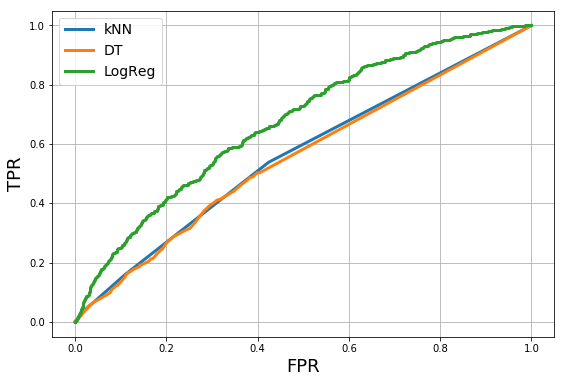

kNN ROC AUC    : 0.5619278894033576
DT ROC AUC     : 0.5539972813389406
LogReg ROC AUC : 0.6743091249781704


In [24]:
plt.figure(figsize=(9, 6))
plt.plot(fpr_knn, tpr_knn, linewidth=3, label='kNN')
plt.plot(fpr_dt, tpr_dt, linewidth=3, label='DT')
plt.plot(fpr_logreg, tpr_logreg, linewidth=3, label='LogReg')

plt.xlabel('FPR', size=18)
plt.ylabel('TPR', size=18)

plt.legend(loc='best', fontsize=14)
plt.grid(b=1)
plt.show()

print('kNN ROC AUC    :', auc_knn)
print('DT ROC AUC     :', auc_dt)
print('LogReg ROC AUC :', auc_logreg)

### Precision-Recall curve

The same idea as for ROC curve.

In [25]:
from sklearn.metrics import precision_recall_curve, auc

precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_test_proba_knn)
#auc_knn = auc(fpr_knn, tpr_knn)

precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_test_proba_dt)
#auc_dt = auc(fpr_dt, tpr_dt)

precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, y_test_proba_logreg)
#auc_logreg = auc(fpr_logreg, tpr_logreg)

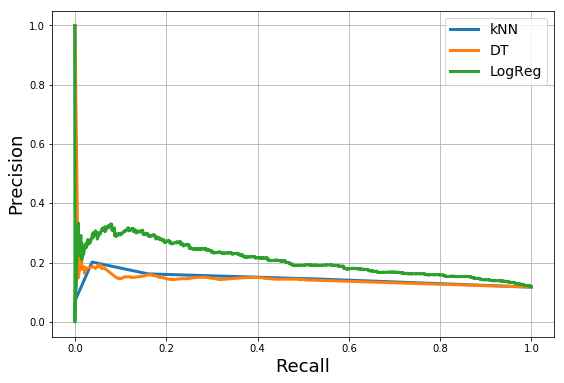

In [26]:
plt.figure(figsize=(9, 6))
plt.plot(recall_knn, precision_knn, linewidth=3, label='kNN')
plt.plot(recall_dt, precision_dt, linewidth=3, label='DT')
plt.plot(recall_logreg, precision_logreg, linewidth=3, label='LogReg')

plt.xlabel('Recall', size=18)
plt.ylabel('Precision', size=18)

plt.legend(loc='best', fontsize=14)
plt.grid(b=1)
plt.show()

**Questions**:
* Which classifier is better?
* How can you improve models quality?

---

# Regression Quaity Metrics

## Create Data

In [27]:
# Create the dataset
X = np.linspace(0, 6, 200)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + np.random.RandomState(1).normal(0, 0.1, X.shape[0]) + 3

In [28]:
X[:5]

array([[0.        ],
       [0.03015075],
       [0.06030151],
       [0.09045226],
       [0.12060302]])

In [29]:
y[:5]

array([3.16243454, 3.14888995, 3.36141453, 3.49949366, 3.86895208])

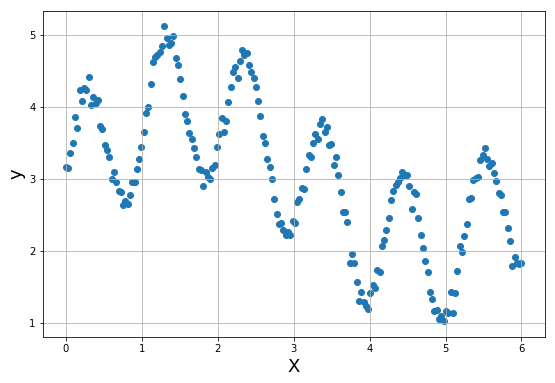

In [30]:
plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], y)

plt.xlabel('X', size=18)
plt.ylabel('y', size=18)
plt.grid(b=1)
plt.show()

## Train / Test Split

In [31]:
from sklearn.model_selection import train_test_split

# Split data into train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

## Fit Regressors

You have learnt three regressors:
* kNN
* Decision Tree
* Linear Regression

We will use scikit-learn implementation of these regressors. Their descriptions: [kNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html), [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html), [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Let's just import them and fit.

In [32]:
# Import kNN regressor
from sklearn.neighbors import KNeighborsRegressor

# Create object of the regressor's class
knn_reg = KNeighborsRegressor(n_neighbors=10)

# Fit the regressor
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='uniform')

In [33]:
# Import Decision Tree regressor
from sklearn.tree import DecisionTreeRegressor

# Create object of the regressor's class
dt_reg = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=4, 
                            min_samples_split=2, min_samples_leaf=1)

# Fit the regressor
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [34]:
# Import Linear Regression regressor
from sklearn.linear_model import LinearRegression

# Create object of the regressor's class
linreg = LinearRegression()

# Fit the regressor
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Make Predictions

In [35]:
# kNN
y_test_knn_reg = knn_reg.predict(X_test)

# DT
y_test_dt_reg = dt_reg.predict(X_test)

# LinReg
y_test_linreg = linreg.predict(X_test)

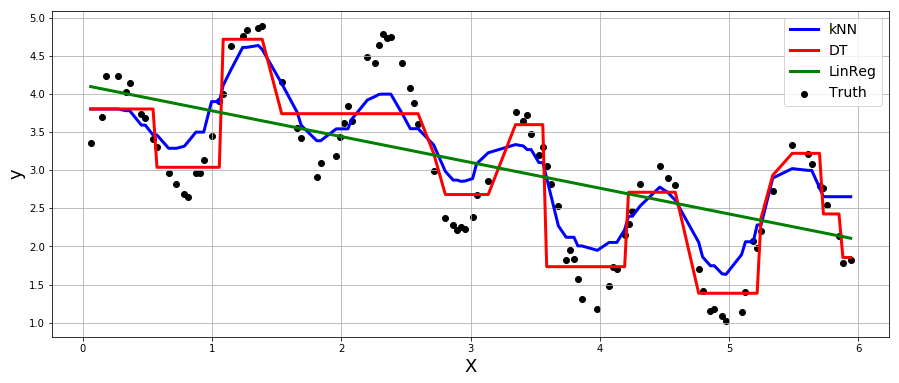

In [36]:
plt.figure(figsize=(15, 6))
plt.scatter(X_test[:, 0], y_test, color='0', label='Truth')

sortd_inds = np.argsort(X_test[:, 0])
plt.plot(X_test[sortd_inds, 0], y_test_knn_reg[sortd_inds], linewidth=3, color='b', label='kNN')
plt.plot(X_test[sortd_inds, 0], y_test_dt_reg[sortd_inds], linewidth=3, color='r', label='DT')
plt.plot(X_test[sortd_inds, 0], y_test_linreg[sortd_inds], linewidth=3, color='g', label='LinReg')

plt.xlabel('X', size=18)
plt.ylabel('y', size=18)
plt.legend(loc='best', fontsize=14)
plt.grid(b=1)
plt.show()

**Questions**:
* How can you explain behavior of the regressors?
* What will happen if to change their hyperparameters?

## Quality Metrics

**1. (R)MSE ((Root) Mean Squared Error)**

$$ L(\hat{y}, y) = \frac{1}{N}\sum\limits_{n=1}^N (y_n - \hat{y}_n)^2$$

**2. MAE (Mean Absolute Error)**

$$ L(\hat{y}, y) = \frac{1}{N}\sum\limits_{n=1}^N |y_n - \hat{y}_n|$$

**3. RSE (Relative Squared Error)**

$$ L(\hat{y}, y) = \sqrt\frac{\sum\limits_{n=1}^N (y_n - \hat{y}_n)^2}{\sum\limits_{n=1}^N (y_n - \bar{y})^2}$$

**4. RAE (Relative Absolute Error)**

$$ L(\hat{y}, y) = \frac{\sum\limits_{n=1}^N |y_n - \hat{y}_n|}{\sum\limits_{n=1}^N |y_n - \bar{y}|}$$

**5. MAPE (Mean Absolute Persentage Error)**

$$ L(\hat{y}, y) = \frac{100}{N} \sum\limits_{n=1}^N\left|\frac{ y_n - \hat{y}_n}{y_n}\right|$$


**6. RMSLE (Root Mean Squared Logarithmic Error)**

$$ L(\hat{y}, y) = \sqrt{\frac{1}{N}\sum\limits_{n=1}^N(\log(y_n + 1) - \log(\hat{y}_n + 1))^2}$$

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score

def regression_quality_metrics_report(y_true, y_pred):
    
    rmse = np.sqrt( mean_squared_error(y_true, y_pred) )
    mae = mean_absolute_error(y_true, y_pred)
    rse = np.sqrt( ( (y_true - y_pred)**2 ).sum() / ( (y_true - y_true.mean())**2 ).sum() )
    rae = np.abs( y_true - y_pred ).sum() / np.abs( y_true - y_true.mean() ).sum()
    mape = 100. / len(y_true) * np.abs( 1. - y_pred/y_true ).sum()
    rmsle = np.sqrt( mean_squared_log_error(y_true, y_pred) )
    
    return [rmse, mae, rse, rae, mape, rmsle]

In [38]:
metrics_report = pd.DataFrame(columns=['RMSE', 'MAE', 'RSE', 'RAE', 'MAPE', 'RMSLE'])

metrics_report.loc['kNN', :] = regression_quality_metrics_report(y_test, y_test_knn_reg)
metrics_report.loc['DT', :] = regression_quality_metrics_report(y_test, y_test_dt_reg)
metrics_report.loc['LinReg', :] = regression_quality_metrics_report(y_test, y_test_linreg)

metrics_report

,RMSE,MAE,RSE,RAE,MAPE,RMSLE
kNN,0.421235,0.357068,0.409443,0.42254,15.3816,0.121781
DT,0.42662,0.326301,0.414677,0.386131,11.9148,0.112371
LinReg,0.80769,0.685106,0.785079,0.810726,29.6347,0.223014


**Questions**:
* Which regressor is better?
* How can you improve models quality?